# Installation

In [122]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Data 

In [123]:
df = pd.read_csv("study_performance.csv")
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Visualization

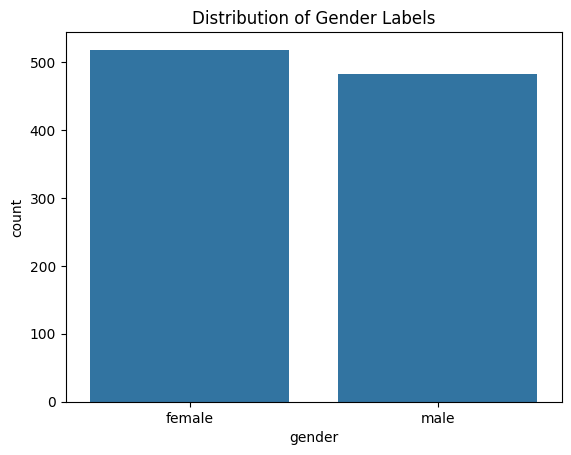

In [124]:
sns.countplot(x='gender', data=df)
plt.title('Distribution of Gender Labels')
plt.show()

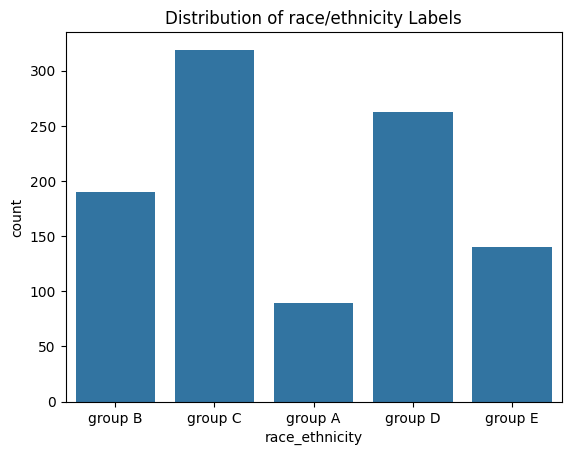

In [125]:
sns.countplot(x='race_ethnicity', data=df)
plt.title('Distribution of race/ethnicity Labels')
plt.show()

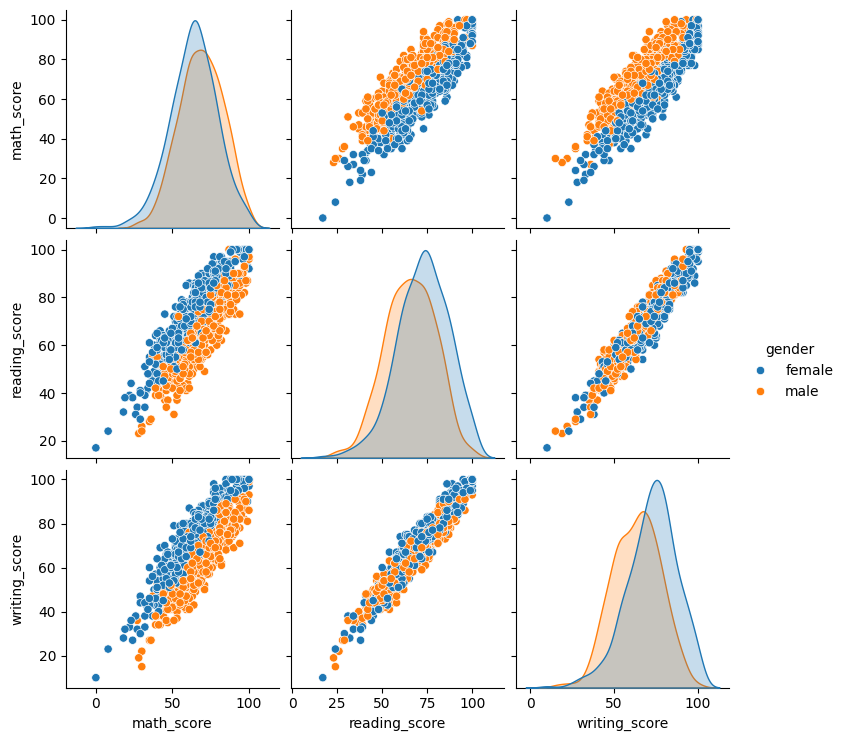

In [126]:
sns.pairplot(df, hue='gender')
#plt.title('Pairplot of Features by Quality Label')
plt.show()

# prepare data

gender: male (1), female (2) <br>
race_ethnicity: A (1), B(2), C(3), D(4), E (5) <br>
parental_level_of_education: bachelor's degree (1) ,some college (2) ,master's degree (3) ,associate's degree (4), high school (5), some high school (6) <br>
lunch: standard (1), free/reduced (2) <br>
test_preparation_course: none (1), completed (2)

In [127]:
X = df.iloc[:, 0:5]
y = df.iloc[:, 5:8]

In [128]:
X['gender'] = X['gender'].apply(lambda x: 2 if x == 'female' else 1)
X['race_ethnicity'] = X['race_ethnicity'].apply(lambda x: {'group A': 1, 'group B': 2, 'group C': 3, 'group D': 4, 'group E': 5}[x])
X['parental_level_of_education'] = X['parental_level_of_education'].apply(lambda x: {"bachelor's degree": 1,'some college': 2,"master's degree": 3,"associate's degree": 4,'high school': 5,'some high school': 6}[x])
X['lunch'] = X['lunch'].apply(lambda x: 2 if x == 'free/reduced' else 1)
X['test_preparation_course'] = X['test_preparation_course'].apply(lambda x: 2 if x == 'completed' else 1)

In [129]:
df1 = df
df1['gender'] = df1['gender'].apply(lambda x: 2 if x == 'female' else 1)
df1['race_ethnicity'] = df1['race_ethnicity'].apply(lambda x: {'group A': 1, 'group B': 2, 'group C': 3, 'group D': 4, 'group E': 5}[x])
df1['parental_level_of_education'] = df1['parental_level_of_education'].apply(lambda x: {"bachelor's degree": 1,'some college': 2,"master's degree": 3,"associate's degree": 4,'high school': 5,'some high school': 6}[x])
df1['lunch'] = df1['lunch'].apply(lambda x: 2 if x == 'free/reduced' else 1)
df1['test_preparation_course'] = df1['test_preparation_course'].apply(lambda x: 2 if x == 'completed' else 1)

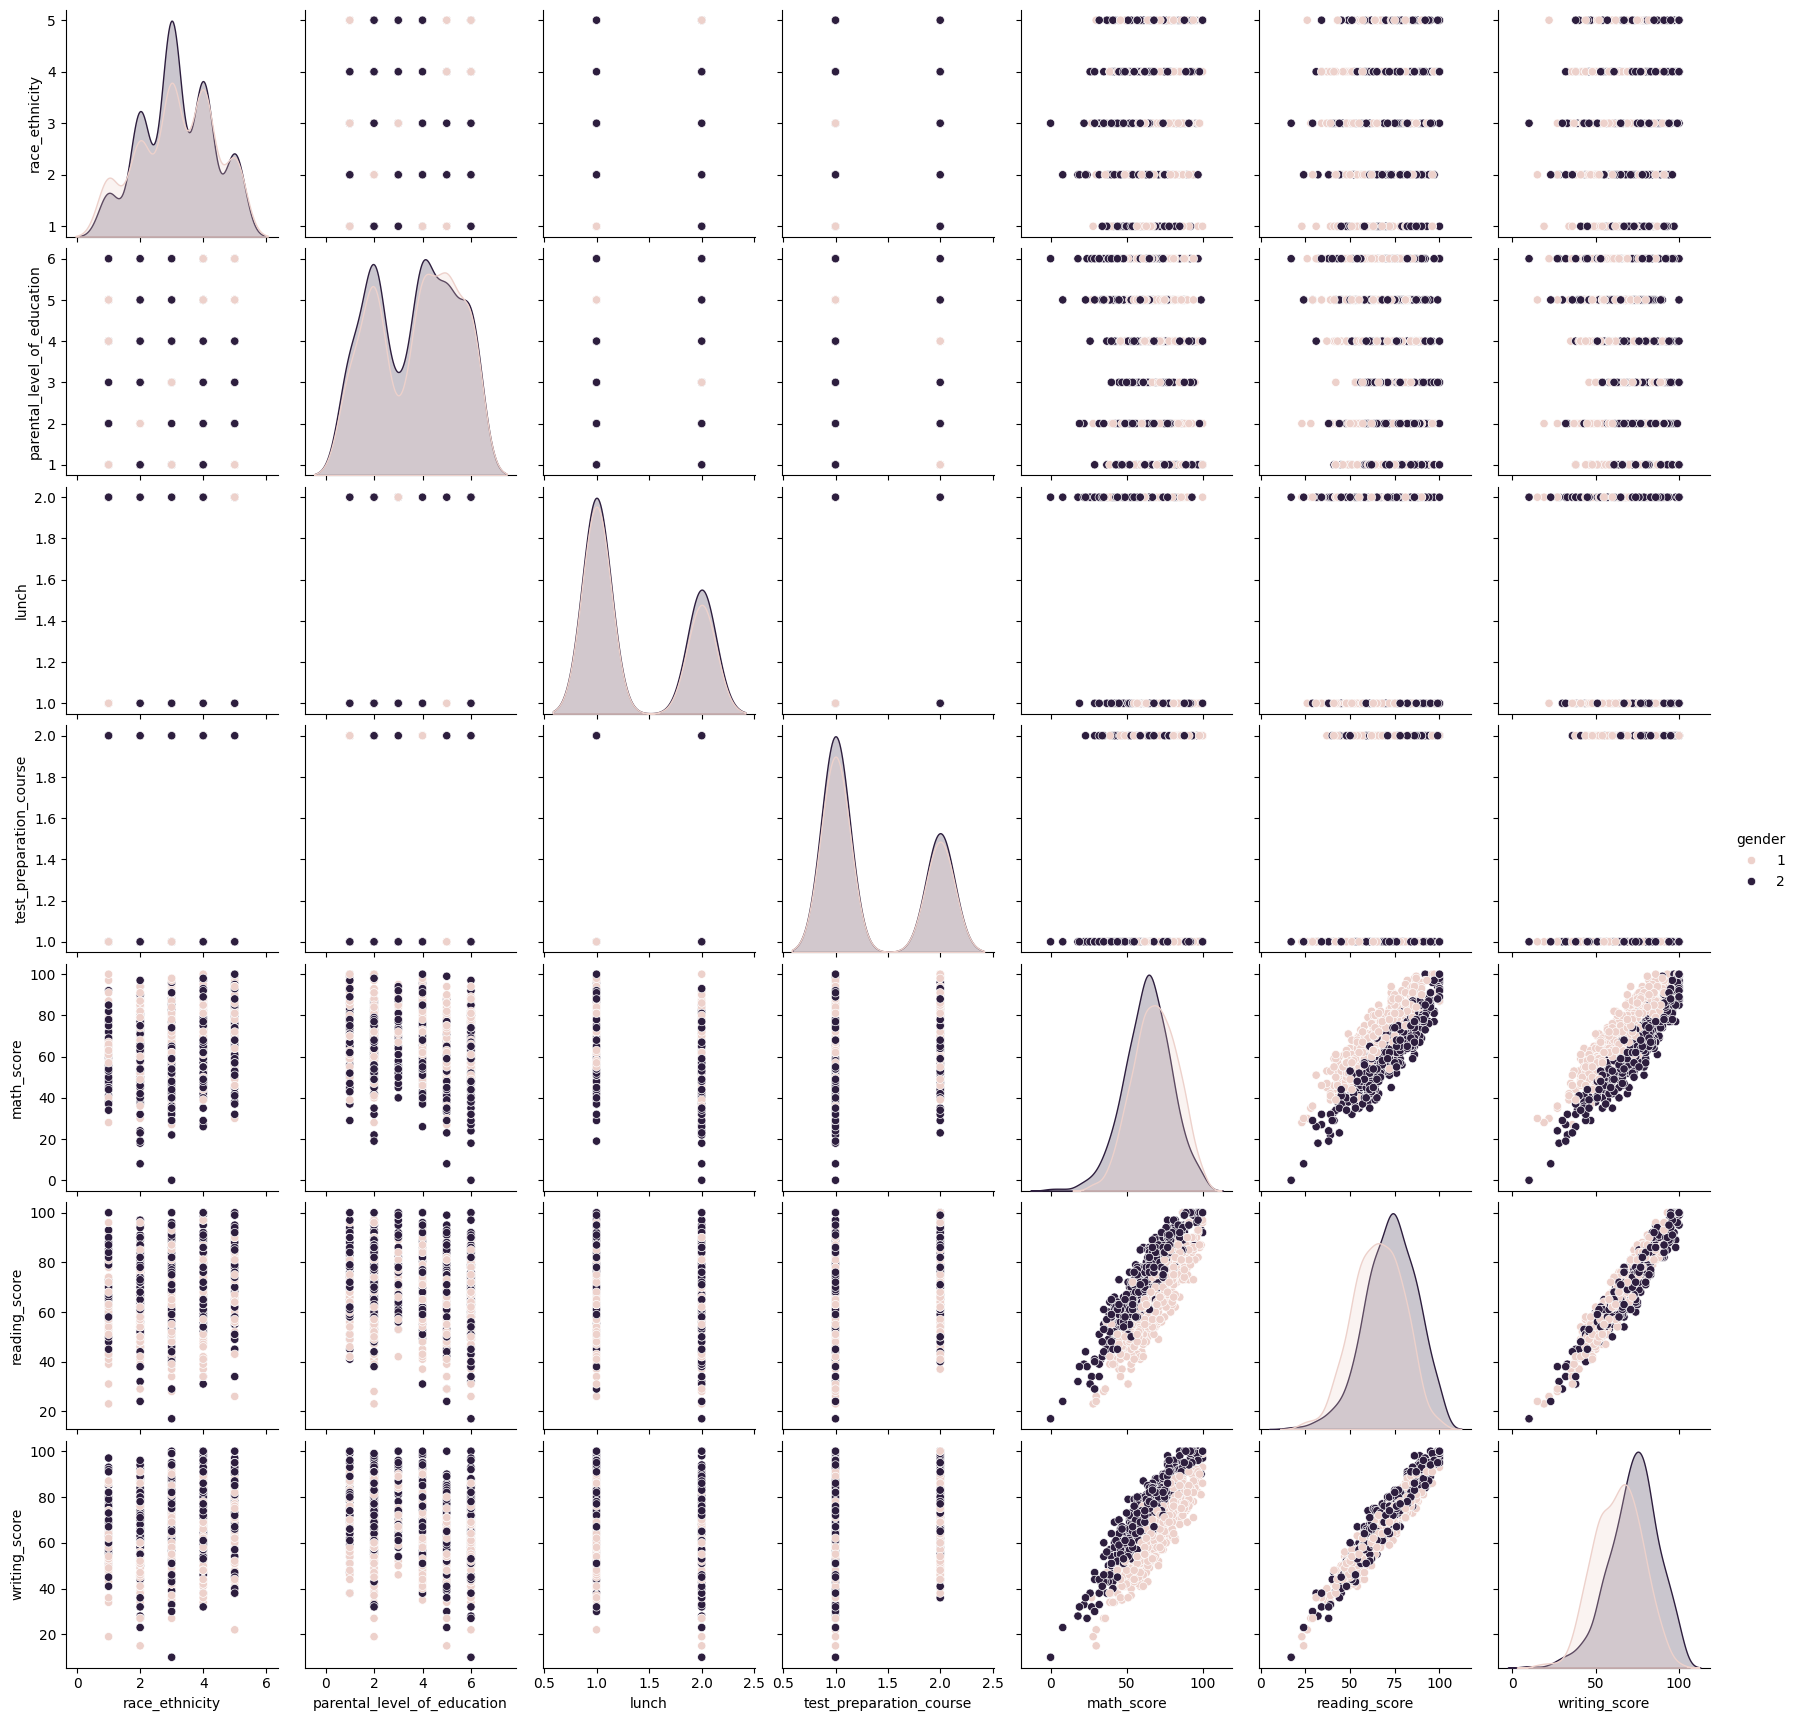

In [139]:
sns.pairplot(df1, hue='gender')
plt.show()

# Predictions

In [131]:
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
0,2,2,1,1,1
1,2,3,2,1,2
2,2,2,3,1,1
3,1,1,4,2,1
4,1,3,2,1,1
...,...,...,...,...,...
995,2,5,3,1,2
996,1,3,5,2,1
997,2,3,5,2,2
998,2,4,2,1,2


In [132]:
y

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [133]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
model  = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [135]:
mse = mean_squared_error(y_test, y_pred)

In [136]:
print("Mean Squared Error:", mse)

Mean Squared Error: 191.048142447528


# show model stats

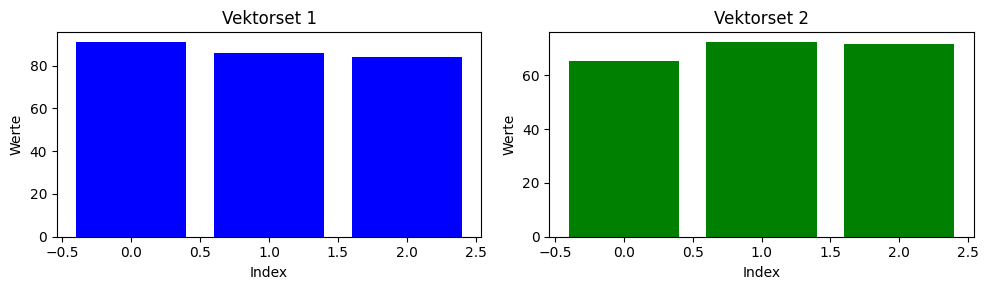

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Beispiel-Daten für zwei 1x3-Vektorsets
vector_set_1 = np.array(y_test)
vector_set_2 = y_pred

# Erstelle Subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 3))

# Plot für das erste Vektorset
axs[0].bar(range(len(vector_set_1[0])), vector_set_1[0], color='blue')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Werte')
axs[0].set_title('Vektorset 1')

# Plot für das zweite Vektorset
axs[1].bar(range(len(vector_set_2[0])), vector_set_2[0], color='green')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Werte')
axs[1].set_title('Vektorset 2')

# Justiere die Layouts, um Überlappungen zu vermeiden
plt.tight_layout()

plt.show()